# 1.B SOR IMPLEMENTATION

In [1]:
# -*- coding: utf-8 -*-
import numpy as np
from numpy import dot
from numpy.linalg import norm, inv
from time import time
import matplotlib.pyplot as plt

# Creates the inner B matrix
def create_pentadiagonal(n):
    ones = np.ones(n)
    main_diag = 3*ones
    second_diag = -4*ones[:-1]
    third_diag = ones[:-2]
    B = np.diag(main_diag) + np.diag(second_diag,1) + np.diag(third_diag,2)
    B = B + B.T
    return B

# Creates the diagonal part of A, named D
def create_d(n):
    I = np.eye(n)
    B = create_pentadiagonal(n)
    D = np.kron(I, 6*I + B)
    return D

# Creates the lower triangular part of A, named L
def create_l(n):
    I = np.eye(n)
    L = np.kron(np.diag(np.ones(n-1),1),-4*I).T
    F = np.kron(np.diag(np.ones(n-2),2),I).T
    return -(L + F)


# SOR function.
def sor(D, L, b, w, tol):
    
    err = 1
    m = D.shape[0]
    x_old = 0.5 * np.ones(m)
    iter = 0
    inverse = inv(D - w*L)
    term1 = dot(inverse, (w * L.T + (1 - w)*D))
    term2 = dot((w * inverse), b)
    
    start = time()                             # The algorithm measures elapsed time based on iterations alone
    while err > tol:                           # It was not deemed necessary to add a restriction on number of iterations
        x_new = dot(term1, x_old) + term2      
        err = norm(x_new - x_old)
        x_old = x_new
        iter += 1
    end = time()
    elapsed = end - start
    return x_new, iter, err, elapsed



# Initializes parameters for SOR
n = 32                                          # dimensions of inner matrix B
D = create_d(n)                                 # D matrix
L = create_l(n)                                 # L matrix
b = np.ones(n**2)                               # b vector
K = np.dot(inv(D), (L+L.T))                     # matrix K of which we need to compute the spectral radius for w optimal
sr = np.real(max(np.linalg.eigvals(K)))         # spectral radius of K
w_optimal = 2/(1+np.sqrt(1-sr**2))              # w optimal
tol = 1e-8                                      # Error tolerance

print("w optimal = ", w_optimal)

# Runs SOR for w optimal
solution = sor(D, L, b, w_optimal, tol)
print('TIME IN SEC FOR OPTIMAL w: ', solution[3])


# Runs SOR for different w and prints results
ws = np.arange(1.0, 2.00, 0.05)                       
iter_plot = []                                 # for plotting results
for w in ws:
    solution = sor(D, L, b, w, tol)
    iter_plot.append(solution[1])
    print("{}th iteration".format(list(ws).index(w)))
    print("w = ", w)
    print("Iterations: ", solution[1])
    print("Absolute error = ", solution[2])
    print("Elapsed time in sec: ", solution[3])
    


# Asserts solution
# A = D - L - L.T
# mat = dot(A, solution[0])

w optimal =  1.96887477979
TIME IN SEC FOR OPTIMAL w:  4.280830383300781
0th iteration
w =  1.0
Iterations:  81823
Absolute error =  9.99950536108e-09
Elapsed time in sec:  24.82305335998535
1th iteration
w =  1.05
Iterations:  74373
Absolute error =  9.99914284159e-09
Elapsed time in sec:  22.195640325546265
2th iteration
w =  1.1
Iterations:  67563
Absolute error =  9.99852244287e-09
Elapsed time in sec:  20.477637767791748
3th iteration
w =  1.15
Iterations:  61310
Absolute error =  9.99966577838e-09
Elapsed time in sec:  18.849234104156494
4th iteration
w =  1.2
Iterations:  55546
Absolute error =  9.99986535303e-09
Elapsed time in sec:  16.710431337356567
5th iteration
w =  1.25
Iterations:  50212
Absolute error =  9.99892952367e-09
Elapsed time in sec:  15.41144323348999
6th iteration
w =  1.3
Iterations:  45258
Absolute error =  9.9980862468e-09
Elapsed time in sec:  13.306625366210938
7th iteration
w =  1.35
Iterations:  40641
Absolute error =  9.99718823019e-09
Elapsed time in

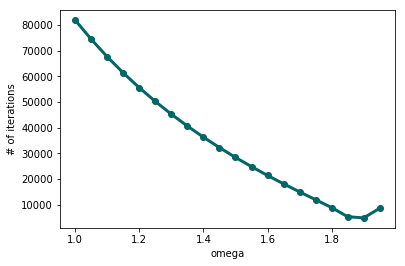

In [2]:
x = ws
y = np.array(iter_plot)

plt.plot(x, y, color='#006666', marker='o',linewidth=3, markersize=6)
plt.xlabel('omega')
plt.ylabel('# of iterations')
plt.show()

# CONCLUSIONS
It is interesting to see that the best results were not obtained for the expected w optimal, but for w = 1.90. This could be due to the fact that the spectral radius of K matrix is very close to 1, so w optimal, as calculated above, may be a little off.

What is more, we can see that the number of iterations for w = 1.95 are further from those of w = 1.90 than those of w = 1.85. This leads us to believe that it is rather preferable to underestimate w in reasonable range, than to overestimate it, if we are not sure about the optimal value of w. However, this is a conclusion based solely on the output of this particular problem, for which we do not have enough information about larger than optimal omega, since our best omega is very close to 2, which is the maximum value. This conclusion contradicts the general rule of thumb found in literature[1], which states that, in general, it is better to overestimate than to underestimate the value of omega.

Finally, we should point out that, as expected, SOR is slower than Cholesky decomposition, in this implementation at least. However, it is still a pretty efficient method to calculate the x vector, even without any special optimization.

[1] S. Yang, M. K. Gobbert, "The Optimal Relaxation Parameter for the SOR Method Applied to the Poisson Equation in Any Space Dimensions", University of Maryland, Baltimore, 2009